In [2]:
import pandas as pd

file_path = 'C:\\Users\\User\\OneDrive\\Desktop\\python_developer\\partizan_2022\\data\\partizan_2022_cleaned.csv'

df = pd.read_csv(file_path)

### Vizualization

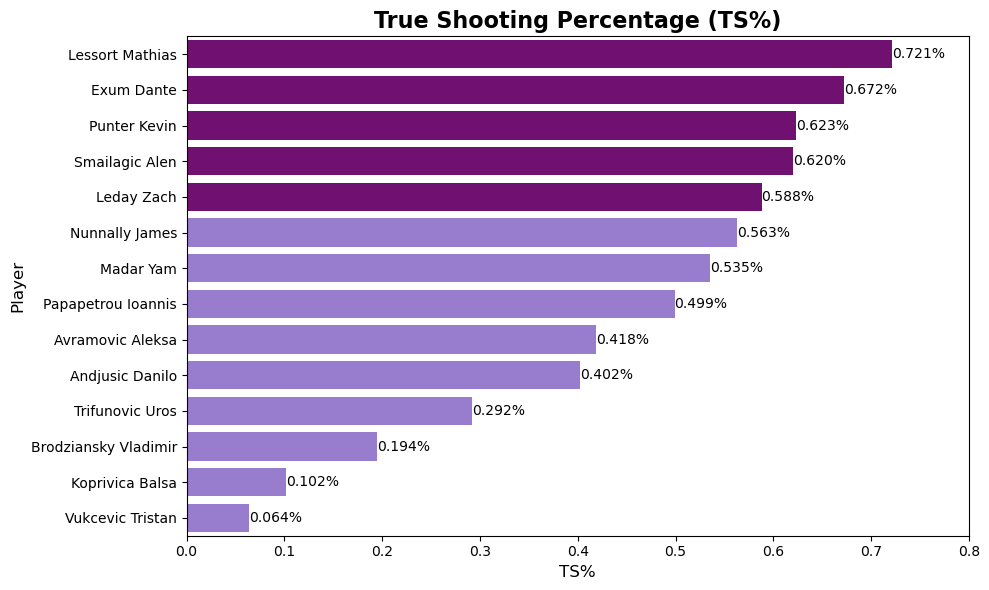

In [15]:
import matplotlib.pyplot as plt
import seaborn as sns

# 1. TS% 

# code snippet from previous notebook (efficiency_metrics)
players = df[df['player'] != 'PARTIZAN MOZZART BET BELGRADE'].copy()
players['field_goals_attempted'] = players['two_points_attempted'] + players['three_points_attempted']
players['ts_percentage'] = players['points'] / (2 * (players['field_goals_attempted'] + 0.44 * players['free_throws_attempted']))
players['ts_percentage'] = players['ts_percentage'].fillna(0).replace([float('inf'), -float('inf')], 0)
avg_ts = players.groupby('player')['ts_percentage'].mean().sort_values(ascending=False).head(14)

# define different colors to separate top 5 players
n_players = len(avg_ts)
top_5_players = '#800080'
other_players = '#9370DB'

# create a color separation
colors = [top_5_players if i < 5 else other_players for i in range(n_players)]

plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_ts.values, y=avg_ts.index, hue=avg_ts.index, palette=colors, width=0.8)
plt.title('True Shooting Percentage (TS%)', fontsize=16, fontweight='bold')
plt.xlabel('TS%', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.xlim(0, 0.8)

# add TS% values to the bars
for i, v in enumerate(avg_ts.values):
    ax.text(v , i, f'{v:.3f}%', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()



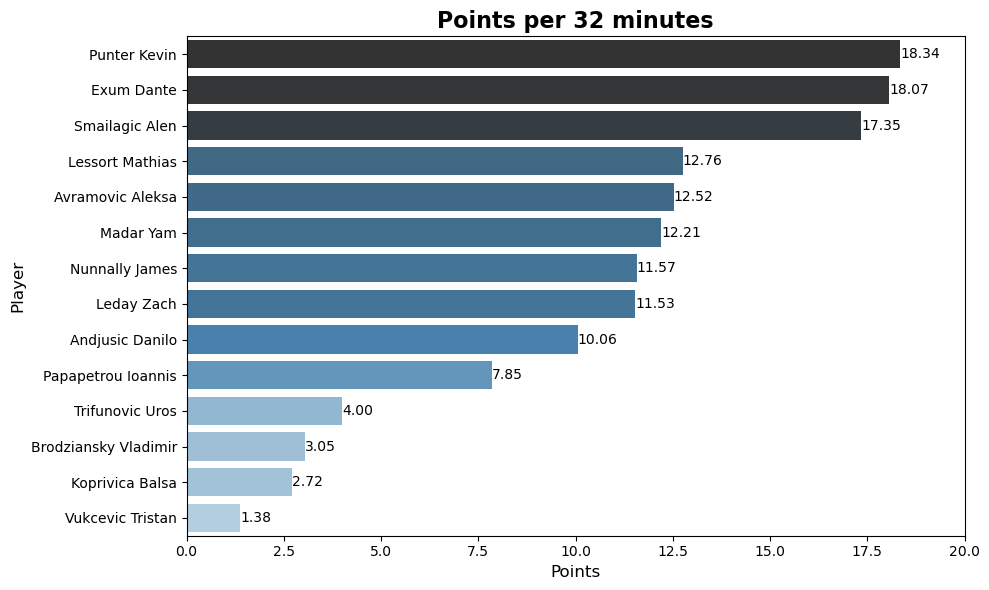

In [10]:
# 2. Points per 32 minutes 

# code snippet from previous notebook (efficiency_metrics)
players['points_per_32'] = (players['points'] / players['total_seconds']) * 1920
players['points_per_32'] = players['points_per_32'].fillna(0).replace([float('inf'), -float('inf')], 0)
avg_points_per_32 = players.groupby('player')['points_per_32'].mean().sort_values(ascending=False).head(14)

# ploting
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_points_per_32.values, y=avg_points_per_32.index, hue=avg_points_per_32.values, palette='Blues_d', legend=False)
plt.title('Points per 32 minutes', fontsize=16, fontweight='bold')
plt.xlabel('Points', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.xlim(0,20)

# add values to the bars
for i, v in enumerate(avg_points_per_32.values):
    ax.text(v , i, f'{v:.2f}', va='center', ha='left', fontsize=10)

plt.tight_layout()
plt.show()


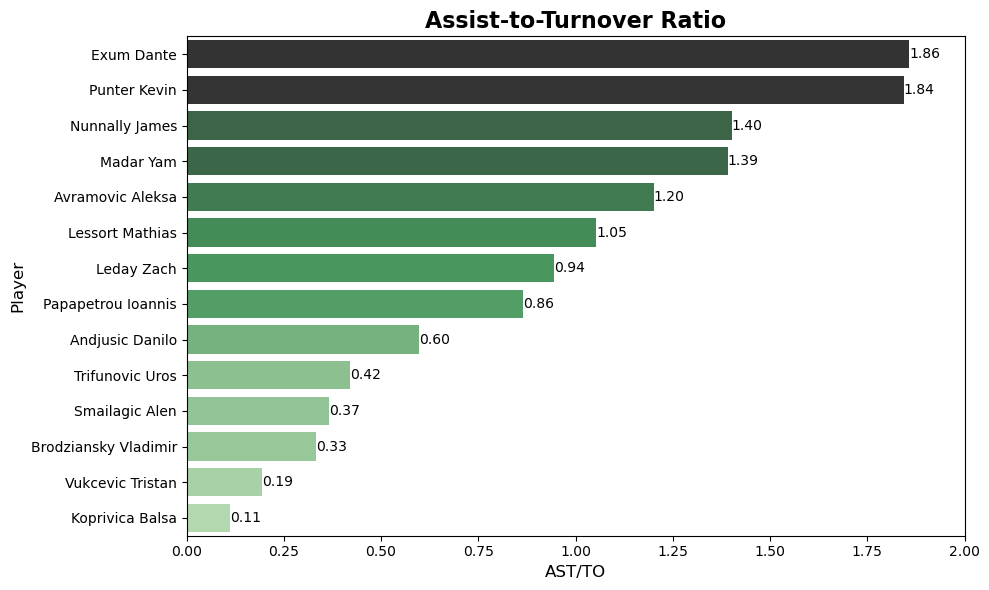

In [12]:
# 3. Assist-to-Turnover Ratio

# code snippet from previous notebook (efficiency_metrics)
players['ast_to_ratio'] = players.apply(
    lambda row: row['assists'] if row['turnovers'] == 0 else row['assists'] / row['turnovers'], 
    axis=1
)
players['ast_to_ratio'] = players['ast_to_ratio'].replace([float('inf'), -float('inf')], 0)
avg_ast_to = players.groupby('player')['ast_to_ratio'].mean().sort_values(ascending=False).head(14)


# ploting 
plt.figure(figsize=(10, 6))
ax = sns.barplot(x=avg_ast_to.values, y=avg_ast_to.index, hue=avg_ast_to.values, palette='Greens_d', legend=False)
plt.title('Assist-to-Turnover Ratio', fontsize=16, fontweight='bold')
plt.xlabel('AST/TO', fontsize=12)
plt.ylabel('Player', fontsize=12)
plt.xlim(0,2)

# add values to the bars
for i, v in enumerate(avg_ast_to.values):
    ax.text(v , i, f'{v:.2f}', va='center', ha='left', fontsize=10)
    
plt.tight_layout()
plt.show()
